# PSPNet Model

Reference: https://github.com/divamgupta/image-segmentation-keras

In [ ]:
!pip install keras-segmentation

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.3 MB 20.4 MB/s 
  Created wheel for keras-segmentation: filename=keras_segmentation-0.3.0-py3-none-any.whl size=29071 sha256=347c307c3635788bbe6e5aecfe997048410de770c039c9798c6f9835aa6f193b
  Stored in directory: /root/.cache/pip/wheels/68/dc/b3/596a3e2461ba16e935ef31661c26e823f841cfb577cec4c47a
Successfully built keras-segmentation
  Attempting uninstall: imageio
    Found existing installation: imageio 2.4.1
    Uninstalling imageio-2.4.1:
      Successfully uninstalled imageio-2.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
from keras_segmentation.pretrained import pspnet_101_cityscapes

model = pspnet_101_cityscapes()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from PIL import Image
import os, os.path
import glob

imgs = []
path = "/content/drive/MyDrive/GetMapillaryImages"
path2 = "/content/drive/MyDrive"
valid_images = ["png"]

In [ ]:
path = glob.glob(path+'/*.png')

In [ ]:
len(path)

In [ ]:
#split paths into two to avoid the problematic image
path_split1 = path[:1579]
path_split2 = path[1580:]

In [ ]:
len(path_split2)

In [ ]:
for i in path:
  try:
      out = model.predict_multiple(
        inps=path[20850:],
        out_dir="/content/drive/MyDrive/SVImage_Annotation",prediction_width=500, prediction_height=500
)
  except AttributeError:
    continue

In [ ]:
test_images = os.listdir('/content/drive/MyDrive/SVImage_Annotation')

In [ ]:
output = '/content/drive/MyDrive/SVImage_Annotation'

In [ ]:
ops = glob.glob(os.path.join(output, "*.png"))
ops = sorted(ops)

In [ ]:
from PIL import Image
import glob
image_list = []
for filename in glob.glob('/content/drive/MyDrive/SVImage_Annotation/*.png'):
    im=Image.open(filename)
    image_list.append(im)

In [ ]:
import numpy as np

# Open image and ensure RGB
im = im.convert('RGB')

# Make into Numpy array
na = np.array(im)

# Get colours and corresponding counts
colours, counts = np.unique(na.reshape(-1,3), axis=0, return_counts=1)

print(colours, counts)

[[ 20 215 197]
 [ 21 214 196]
 [ 21 215 197]
 ...
 [244 105 160]
 [244 105 161]
 [244 106 159]] [68093    14    19 ...     2    16     2]


In [ ]:
import cv2 
import numpy as np
import pandas as pd 
import glob

In [ ]:
pic_dir='/content/drive/MyDrive/SVImage_Annotation/*.png'
pic_names=glob.glob(pic_dir)

In [ ]:
list(pic_names)

['/content/drive/MyDrive/SVImage_Annotation/206000028101275.png',
 '/content/drive/MyDrive/SVImage_Annotation/474829547137200.png',
 '/content/drive/MyDrive/SVImage_Annotation/560851701547702.png',
 '/content/drive/MyDrive/SVImage_Annotation/285858163267706.png',
 '/content/drive/MyDrive/SVImage_Annotation/781319716088758.png',
 '/content/drive/MyDrive/SVImage_Annotation/917088495742838.png',
 '/content/drive/MyDrive/SVImage_Annotation/883048305876591.png',
 '/content/drive/MyDrive/SVImage_Annotation/3715836795210226.png',
 '/content/drive/MyDrive/SVImage_Annotation/288390293026933.png',
 '/content/drive/MyDrive/SVImage_Annotation/544757280023514.png',
 '/content/drive/MyDrive/SVImage_Annotation/212980383703392.png',
 '/content/drive/MyDrive/SVImage_Annotation/980626449339540.png',
 '/content/drive/MyDrive/SVImage_Annotation/847527409445644.png',
 '/content/drive/MyDrive/SVImage_Annotation/490852325444860.png',
 '/content/drive/MyDrive/SVImage_Annotation/481919160254467.png',
 '/conten

In [ ]:
img=cv2.imread(pic_names[0])
print(img)

[[[ 72 229  46]
  [ 72 229  46]
  [ 72 229  46]
  ...
  [ 97 113 122]
  [ 97 113 122]
  [ 97 113 122]]

 [[ 72 229  46]
  [ 72 229  46]
  [ 72 229  46]
  ...
  [ 97 113 122]
  [ 97 113 122]
  [ 97 113 122]]

 [[ 72 229  46]
  [ 72 229  46]
  [ 72 229  46]
  ...
  [ 97 113 122]
  [ 97 113 122]
  [ 97 113 122]]

 ...

 [[197 215  20]
  [197 215  20]
  [197 215  20]
  ...
  [197 215  20]
  [197 215  20]
  [197 215  20]]

 [[197 215  20]
  [197 215  20]
  [197 215  20]
  ...
  [197 215  20]
  [197 215  20]
  [197 215  20]]

 [[197 215  20]
  [197 215  20]
  [197 215  20]
  ...
  [197 215  20]
  [197 215  20]
  [197 215  20]]]


In [ ]:
boundaries = [
    ([190, 0, 0], [255,255,255])
    ]

pixel_percentages=[]

for i in range(len(pic_names)):
  img=cv2.imread(pic_names[i])

  for(lower, upper) in boundaries:
    # creates numpy array from boundaries
    lower = np.array(lower, dtype = "uint8")
    upper = np.array(upper, dtype = "uint8")
    # finds colors in boundaries a applies a mask
    mask = cv2.inRange(img, lower, upper)
    output = cv2.bitwise_and(img, img, mask = mask)
    # saves the image
    # cv2.imwrite('2'+img_name, output)
  tot_pixel = output.size
  red_pixel = np.count_nonzero(output)
  percentage = round(red_pixel * 100 / tot_pixel, 2)
  print(percentage)
  pixel_percentages.append(percentage)

Streaming output truncated to the last 5000 lines.
25.95
29.21
33.53
40.04
35.44
29.2
51.18
31.22
48.92
41.29
6.74
2.15
5.35
28.01
33.37
27.9
31.64
41.69
13.97
35.83
48.61
35.92
21.4
42.24
15.24
37.6
14.3
21.12
6.88
28.17
39.38
8.33
12.82
52.36
35.35
2.12
35.49
35.76
24.61
30.43
29.21
40.44
5.92
31.5
27.18
34.36
56.16
2.6
17.26
53.97
25.84
40.06
32.32
30.16
37.4
26.25
21.47
31.63
14.61
32.19
29.63
39.23
37.42
23.61
41.5
0.0
43.86
38.16
44.4
17.46
46.21
32.51
28.98
24.2
35.35
55.23
39.5
33.33
13.9
25.2
5.21
34.51
42.96
33.78
25.87
33.18
29.72
17.93
11.93
7.77
12.8
35.78
31.89
29.73
38.59
35.9
6.97
26.51
23.55
24.71
11.6
21.93
15.02
29.63
53.14
32.11
32.33
40.0
78.2
35.91
40.7
34.66
27.44
4.94
49.13
47.97
1.78
31.11
35.39
10.46
21.33
20.23
53.21
35.18
13.85
6.15
23.46
38.95
24.17
34.08
28.07
23.84
27.02
28.71
38.32
54.6
54.75
23.75
30.97
31.81
8.23
44.26
5.67
24.73
20.87
25.58
32.82
33.11
27.05
19.86
37.34
25.27
34.8
23.07
20.72
28.25
31.87
50.06
12.08
44.98
57.88
1.95
38.36
28.37
37.33


In [ ]:
pixel_percentages = np.array(pixel_percentages)
pixel_percentages

array([24.71, 27.4 , 21.02, ..., 34.03, 37.49, 27.3 ])

In [ ]:
import pandas as pd
#read excel files
data = pd.read_excel('/content/drive/MyDrive/ViennaImageData.xlsx')
data

,Unnamed: 0,image id,URL,Lat,Long,Bounding Box ID
0,0.0,1029745684492395,https://scontent-iad3-2.xx.fbcdn.net/m1/v/t6/A...,16.299435,48.251344,1.0
1,1.0,793496551294387,https://scontent-iad3-2.xx.fbcdn.net/m1/v/t6/A...,16.300063,48.251325,1.0
2,2.0,417117873216718,https://scontent-iad3-2.xx.fbcdn.net/m1/v/t6/A...,16.301446,48.251038,1.0
3,3.0,928645064578942,https://scontent-iad3-2.xx.fbcdn.net/m1/v/t6/A...,16.301807,48.250931,1.0
4,4.0,194280519188377,https://scontent-iad3-2.xx.fbcdn.net/m1/v/t6/A...,16.300747,48.251173,1.0
...,...,...,...,...,...,...
24550,24550.0,301703028059540,https://scontent-iad3-1.xx.fbcdn.net/m1/v/t6/A...,16.433745,48.158962,550.0
24551,24551.0,785305009076822,https://scontent-iad3-1.xx.fbcdn.net/m1/v/t6/A...,16.433259,48.159260,550.0
24552,24552.0,1069950133414764,https://scontent-iad3-1.xx.fbcdn.net/m1/v/t6/A...,16.436571,48.157268,550.0
24553,24553.0,1140114506464804,https://scontent-iad3-1.xx.fbcdn.net/m1/v/t6/A...,16.434417,48.158547,550.0


In [ ]:
data['percentage_density']=pd.Series(pixel_percentages)
data

,Unnamed: 0,image id,URL,Lat,Long,Bounding Box ID,percentage_density
0,0.0,1029745684492395,https://scontent-iad3-2.xx.fbcdn.net/m1/v/t6/A...,16.299435,48.251344,1.0,24.71
1,1.0,793496551294387,https://scontent-iad3-2.xx.fbcdn.net/m1/v/t6/A...,16.300063,48.251325,1.0,27.40
2,2.0,417117873216718,https://scontent-iad3-2.xx.fbcdn.net/m1/v/t6/A...,16.301446,48.251038,1.0,21.02
3,3.0,928645064578942,https://scontent-iad3-2.xx.fbcdn.net/m1/v/t6/A...,16.301807,48.250931,1.0,3.88
4,4.0,194280519188377,https://scontent-iad3-2.xx.fbcdn.net/m1/v/t6/A...,16.300747,48.251173,1.0,28.75
...,...,...,...,...,...,...,...
24550,24550.0,301703028059540,https://scontent-iad3-1.xx.fbcdn.net/m1/v/t6/A...,16.433745,48.158962,550.0,NaN
24551,24551.0,785305009076822,https://scontent-iad3-1.xx.fbcdn.net/m1/v/t6/A...,16.433259,48.159260,550.0,NaN
24552,24552.0,1069950133414764,https://scontent-iad3-1.xx.fbcdn.net/m1/v/t6/A...,16.436571,48.157268,550.0,NaN
24553,24553.0,1140114506464804,https://scontent-iad3-1.xx.fbcdn.net/m1/v/t6/A...,16.434417,48.158547,550.0,NaN


In [ ]:
data.dropna()

,Unnamed: 0,image id,URL,Lat,Long,Bounding Box ID,percentage_density
0,0.0,1029745684492395,https://scontent-iad3-2.xx.fbcdn.net/m1/v/t6/A...,16.299435,48.251344,1.0,24.71
1,1.0,793496551294387,https://scontent-iad3-2.xx.fbcdn.net/m1/v/t6/A...,16.300063,48.251325,1.0,27.40
2,2.0,417117873216718,https://scontent-iad3-2.xx.fbcdn.net/m1/v/t6/A...,16.301446,48.251038,1.0,21.02
3,3.0,928645064578942,https://scontent-iad3-2.xx.fbcdn.net/m1/v/t6/A...,16.301807,48.250931,1.0,3.88
4,4.0,194280519188377,https://scontent-iad3-2.xx.fbcdn.net/m1/v/t6/A...,16.300747,48.251173,1.0,28.75
...,...,...,...,...,...,...,...
22538,22538.0,292476859246347,https://scontent-iad3-1.xx.fbcdn.net/m1/v/t6/A...,16.333766,48.161662,501.0,15.84
22539,22539.0,1173131236465300,https://scontent-iad3-1.xx.fbcdn.net/m1/v/t6/A...,16.333862,48.165714,501.0,22.42
22540,22540.0,794073208145578,https://scontent-iad3-1.xx.fbcdn.net/m1/v/t6/A...,16.335944,48.164534,501.0,34.03
22541,22541.0,303600651364896,https://scontent-iad3-1.xx.fbcdn.net/m1/v/t6/A...,16.335375,48.164848,501.0,37.49


In [ ]:
data = data.rename(columns={'Lat': 'Longitude'})
data = data.rename(columns={'Long': 'Latitude'})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24555 entries, 0 to 24554
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          24555 non-null  float64
 1   image id            24555 non-null  int64  
 2   URL                 24555 non-null  object 
 3   Longitude           24267 non-null  float64
 4   Latitude            24267 non-null  float64
 5   Bounding Box ID     24555 non-null  float64
 6   percentage_density  22543 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 1.3+ MB


In [ ]:
df = data[['Longitude', 'Latitude','percentage_density']]

In [ ]:
df.to_csv(path_or_buf='/content/drive/MyDrive/xyz.csv')

In [ ]:
#writing a new json file
df_n.to_file('/content/gdrive/MyDrive/streetdiversity.json')

# Utilities

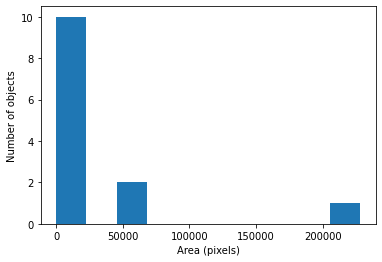

In [ ]:
fig, ax = plt.subplots()
plt.hist(object_areas)
plt.xlabel("Area (pixels)")
plt.ylabel("Number of objects")
plt.show()

In [ ]:
import skimage.measure as measure
props = measure.regionprops(out)
for prop in props:
    print('Label: {} >> Object size: {}'.format(prop.label, prop.area))

Label: 1 >> Object size: 6518
Label: 2 >> Object size: 228105
Label: 3 >> Object size: 578
Label: 4 >> Object size: 229
Label: 5 >> Object size: 2949
Label: 7 >> Object size: 1553
Label: 8 >> Object size: 60552
Label: 9 >> Object size: 1097
Label: 11 >> Object size: 75
Label: 12 >> Object size: 3
Label: 13 >> Object size: 61071
Label: 17 >> Object size: 82
Label: 18 >> Object size: 89


In [ ]:
values = {'Pixels':[object_areas], 'Labels':[object_features]}
x = pd.DataFrame(values)
x

,Pixels,Labels
0,"[6518, 228105, 578, 229, 2949, 1553, 60552, 10...",[<skimage.measure._regionprops.RegionPropertie...


In [ ]:
# Import data from file

stv = pd.read_csv('/content/drive/MyDrive/SVImage/image_meta.txt', delimiter = ' ')

df = pd.DataFrame(stv)

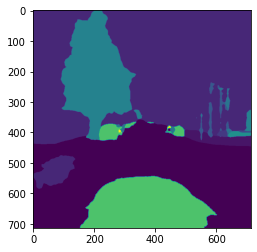

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(out)